<a href="https://www.kaggle.com/code/mosesmoncy/cern-proton-collision-prediction?scriptVersionId=126871829" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

The European Organization for Nuclear Research, known as CERN, is an intergovernmental organization that operates the largest particle physics laboratory in the world.
Proton-Proton collisions are mainly strong interactions in which quark degrees of freedom are involved. There are also electromagnetic processes characterized by small energy loss of incident protons that is small multiplicity of the final state. One can establish a correlation between the impact parameter of the collision and probability of strong or electromagnetic interaction.

Model is created to predict The number of jets (nJets) with transverse momentum above 40 GeV by using Classification Models.

Context:

* Run: The run number of the event. 
* Lumi: The lumi section of the event. 
* Event: The event number of the event. 
* MR: First razor kinematic variable, the MR variable is an estimate of an overall mass scale, which in the limit of massless decay products equals the mass of the heavy parent particle. 
* Rsq: Second razor kinematic variable, the Rsq variable is the square of the ratio R, which quantifies the flow of energy in the plane perpendicular to the beam and the partitioning of momentum between visible and invisible particles. 
* E1,Px1,Py1,Pz1: The four-vector of the leading megajet (with the largest transverse momentum). 
* E2,Px2,Py2,Pz2: The four-vector of the subleading megajet (with the largest transverse momentum). 
* HT: The scalar sum of the transverse momentum of the jets. 
* MET: The magnitude of the vector sum of the transverse energy of the particles in the event. 
* nJets: The number of jets with transverse momentum above 40 GeV. 
* nBJets: The number of b-tagged jets with transverse momentum above 40 GeV.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [2]:
a=pd.read_csv('/kaggle/input/proton-dataset/MultiJetRun2010B.csv')
a

,Run,Lumi,Event,MR,Rsq,E1,Px1,Py1,Pz1,E2,Px2,Py2,Pz2,HT,MET,nJets,nBJets
0,148029,388,302318745,215.553,0.031977,136.7100,-109.89300,-54.03420,-58.9032,142.1790,70.02540,41.12250,-116.5130,203.666,18.31100,2,0
1,148029,388,302323641,155.437,0.042157,83.3865,81.15000,6.88361,-12.9688,73.9025,-72.24720,11.88350,3.0899,154.659,14.77470,2,0
2,148029,388,302336217,400.563,0.026938,253.1840,139.90200,102.64000,-101.9350,535.5510,-110.37900,-89.09290,-516.1790,343.280,25.22110,3,0
3,148029,388,302382289,286.245,0.094192,175.4860,-156.02400,-62.95350,-47.7434,112.8510,89.08430,3.45025,67.9007,257.397,46.02880,2,0
4,148029,388,302403873,204.514,0.018804,833.7950,100.41000,-16.65900,-827.4980,445.6120,-91.19910,15.55830,-390.1440,269.492,8.11345,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21721,149181,1804,1703614264,540.609,0.019221,333.8870,43.55990,-102.70100,114.4280,517.8890,-13.42100,51.57390,-503.3490,393.455,50.30450,4,0
21722,149181,1804,1703630424,336.015,0.028433,190.1890,-7.40921,135.39000,132.1900,152.3330,-6.69605,-130.51800,-76.1992,266.282,23.12280,2,0
21723,149181,1804,1703621104,484.392,0.000920,197.1530,-61.55070,21.76930,110.9250,483.9510,47.52920,-37.96000,-470.8470,261.615,3.71479,4,0
21724,149181,1804,1703642752,215.713,0.055836,647.4060,-78.95460,-88.75690,636.3600,383.0890,80.57020,49.37650,371.1240,213.289,20.95540,2,0


In [3]:
# read first five data

a.head()

,Run,Lumi,Event,MR,Rsq,E1,Px1,Py1,Pz1,E2,Px2,Py2,Pz2,HT,MET,nJets,nBJets
0,148029,388,302318745,215.553,0.031977,136.7100,-109.893,-54.03420,-58.9032,142.1790,70.0254,41.12250,-116.5130,203.666,18.31100,2,0
1,148029,388,302323641,155.437,0.042157,83.3865,81.150,6.88361,-12.9688,73.9025,-72.2472,11.88350,3.0899,154.659,14.77470,2,0
2,148029,388,302336217,400.563,0.026938,253.1840,139.902,102.64000,-101.9350,535.5510,-110.3790,-89.09290,-516.1790,343.280,25.22110,3,0
3,148029,388,302382289,286.245,0.094192,175.4860,-156.024,-62.95350,-47.7434,112.8510,89.0843,3.45025,67.9007,257.397,46.02880,2,0
4,148029,388,302403873,204.514,0.018804,833.7950,100.410,-16.65900,-827.4980,445.6120,-91.1991,15.55830,-390.1440,269.492,8.11345,3,0


In [4]:
# read last five data

a.tail()

,Run,Lumi,Event,MR,Rsq,E1,Px1,Py1,Pz1,E2,Px2,Py2,Pz2,HT,MET,nJets,nBJets
21721,149181,1804,1703614264,540.609,0.019221,333.887,43.55990,-102.7010,114.4280,517.889,-13.42100,51.5739,-503.3490,393.455,50.30450,4,0
21722,149181,1804,1703630424,336.015,0.028433,190.189,-7.40921,135.3900,132.1900,152.333,-6.69605,-130.5180,-76.1992,266.282,23.12280,2,0
21723,149181,1804,1703621104,484.392,0.000920,197.153,-61.55070,21.7693,110.9250,483.951,47.52920,-37.9600,-470.8470,261.615,3.71479,4,0
21724,149181,1804,1703642752,215.713,0.055836,647.406,-78.95460,-88.7569,636.3600,383.089,80.57020,49.3765,371.1240,213.289,20.95540,2,0
21725,149181,1804,1703634776,547.384,0.001232,242.414,191.21800,-118.7580,-37.2528,414.667,-175.48900,83.3315,355.2330,444.869,1.84347,4,0


In [5]:
a.shape

(21726, 17)

In [6]:
a.describe

<bound method NDFrame.describe of           Run  Lumi       Event       MR       Rsq        E1        Px1  \
0      148029   388   302318745  215.553  0.031977  136.7100 -109.89300   
1      148029   388   302323641  155.437  0.042157   83.3865   81.15000   
2      148029   388   302336217  400.563  0.026938  253.1840  139.90200   
3      148029   388   302382289  286.245  0.094192  175.4860 -156.02400   
4      148029   388   302403873  204.514  0.018804  833.7950  100.41000   
...       ...   ...         ...      ...       ...       ...        ...   
21721  149181  1804  1703614264  540.609  0.019221  333.8870   43.55990   
21722  149181  1804  1703630424  336.015  0.028433  190.1890   -7.40921   
21723  149181  1804  1703621104  484.392  0.000920  197.1530  -61.55070   
21724  149181  1804  1703642752  215.713  0.055836  647.4060  -78.95460   
21725  149181  1804  1703634776  547.384  0.001232  242.4140  191.21800   

             Py1       Pz1        E2        Px2        Py2       

In [7]:
a.dtypes

Run         int64
Lumi        int64
Event       int64
MR        float64
Rsq       float64
E1        float64
Px1       float64
Py1       float64
Pz1       float64
E2        float64
Px2       float64
Py2       float64
Pz2       float64
HT        float64
MET       float64
nJets       int64
nBJets      int64
dtype: object

In [8]:
a.isna().sum()

Run       0
Lumi      0
Event     0
MR        0
Rsq       0
E1        0
Px1       0
Py1       0
Pz1       0
E2        0
Px2       0
Py2       0
Pz2       0
HT        0
MET       0
nJets     0
nBJets    0
dtype: int64

<AxesSubplot:ylabel='nJets'>

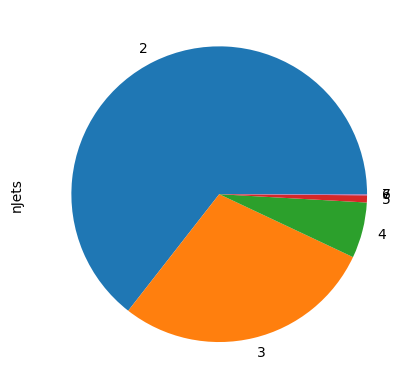

In [9]:
# plot a pie Chart for nJets

a['nJets'].value_counts().plot(kind='pie')

Data Visualisation

<AxesSubplot:xlabel='nJets', ylabel='count'>

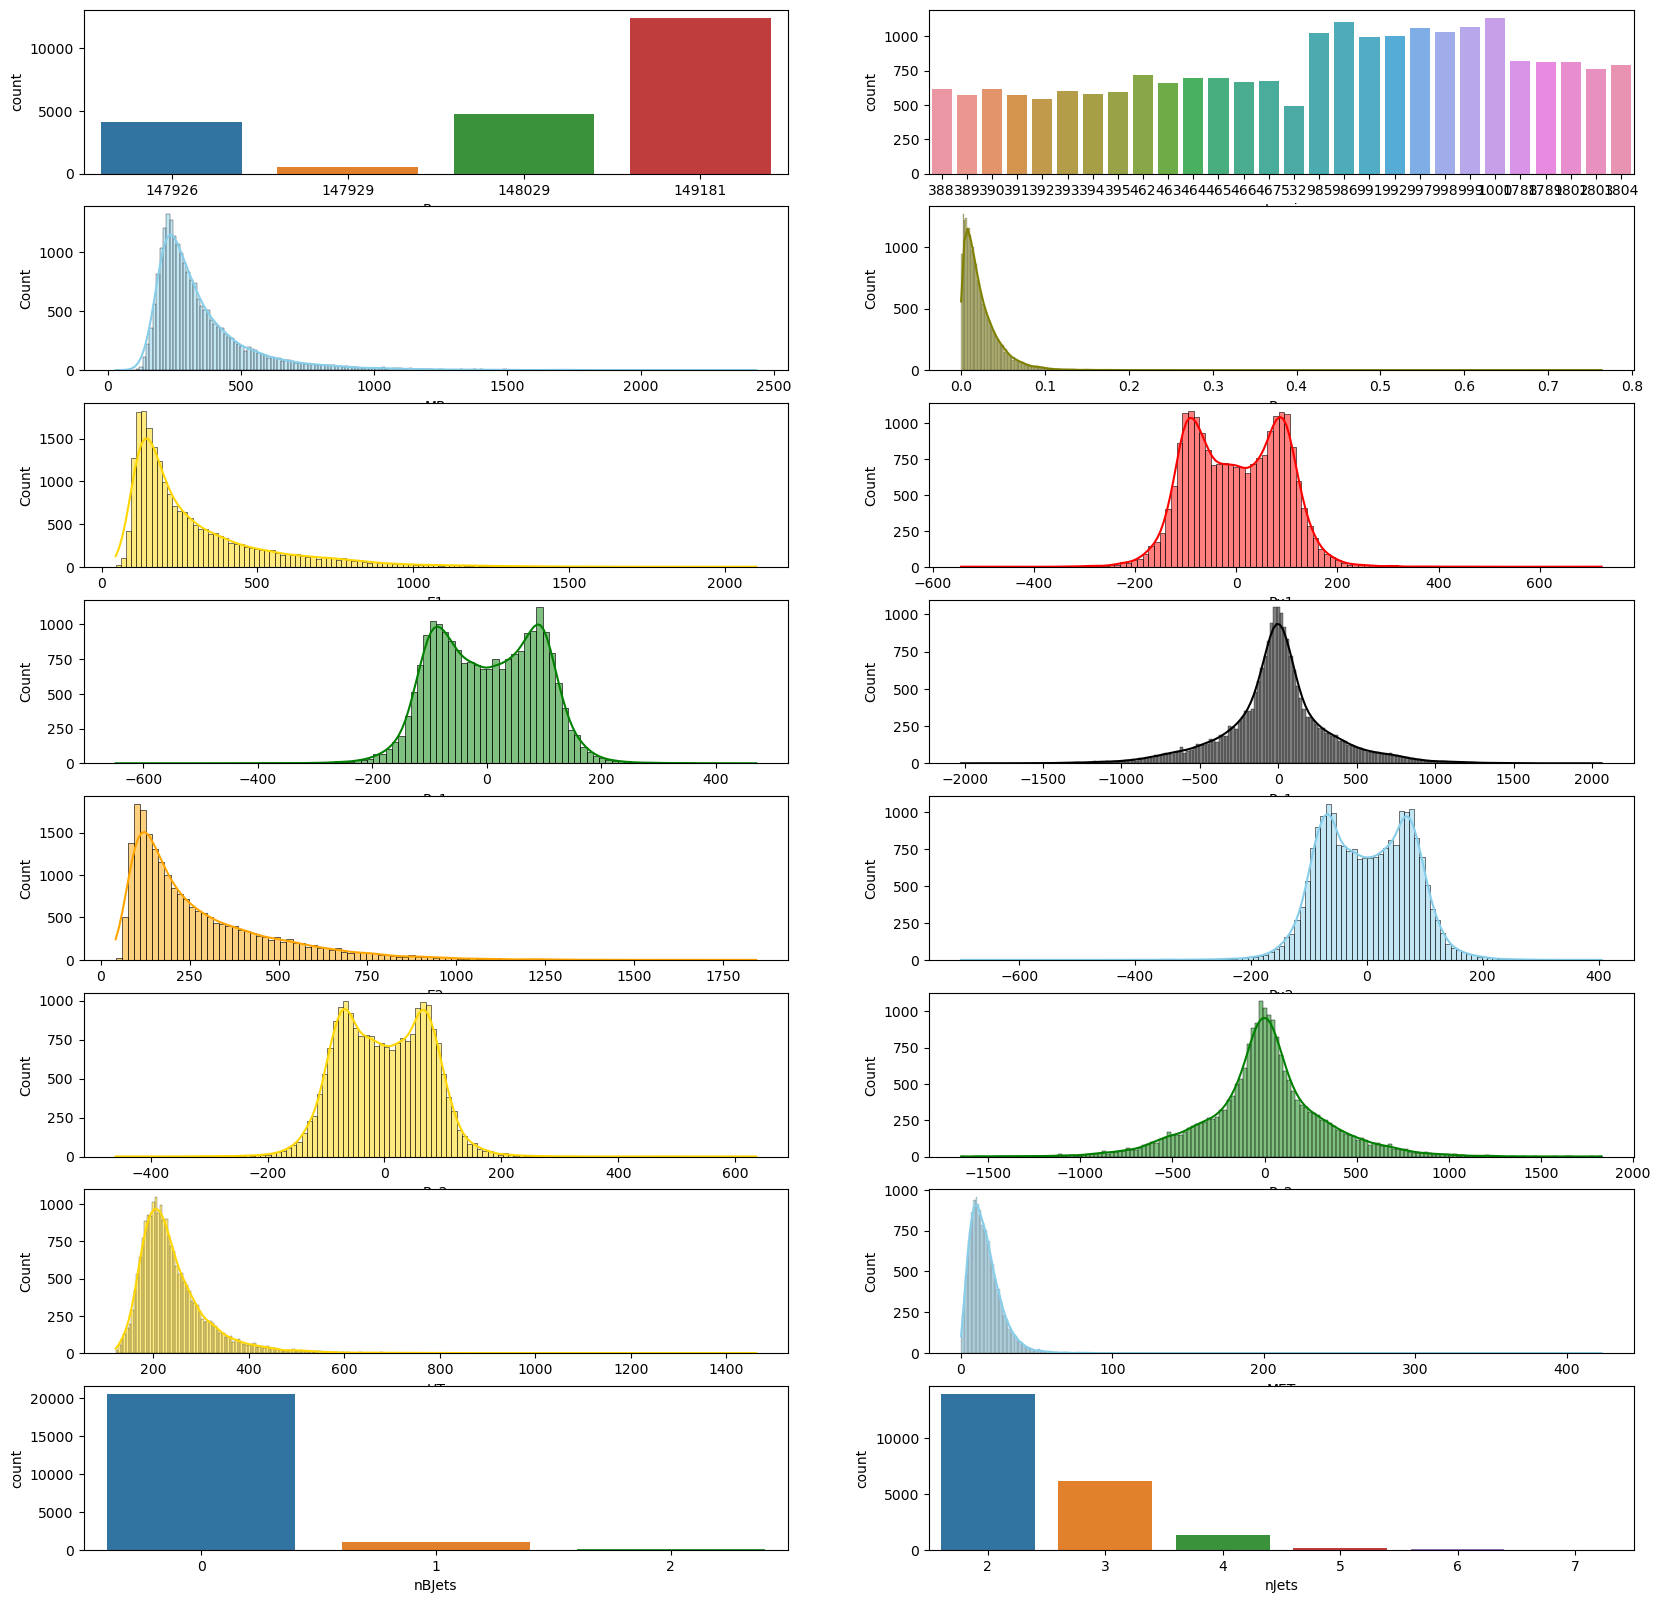

In [10]:
fig, axs = plt.subplots(8, 2, figsize=(20, 20))
sns.countplot(x=a['Run'], ax=axs[0, 0])
sns.countplot(x=a['Lumi'], ax=axs[0, 1])
sns.histplot(data=a['MR'], kde=True, color="skyblue", ax=axs[1, 0])
sns.histplot(data=a['Rsq'], kde=True, color="olive", ax=axs[1, 1])
sns.histplot(data=a['E1'], kde=True, color="gold", ax=axs[2, 0])
sns.histplot(data=a['Px1'], kde=True, color="red", ax=axs[2, 1])
sns.histplot(data=a['Py1'], kde=True, color="green", ax=axs[3, 0])
sns.histplot(data=a['Pz1'], kde=True, color="black", ax=axs[3, 1])
sns.histplot(data=a['E2'], kde=True, color="orange", ax=axs[4, 0])
sns.histplot(data=a['Px2'], kde=True, color="skyblue", ax=axs[4, 1])
sns.histplot(data=a['Py2'], kde=True, color="gold", ax=axs[5, 0])
sns.histplot(data=a['Pz2'], kde=True, color="green", ax=axs[5, 1])
sns.histplot(data=a['HT'], kde=True, color="gold", ax=axs[6, 0])
sns.histplot(data=a['MET'], kde=True, color="skyblue", ax=axs[6, 1])
sns.countplot(x=a['nBJets'], ax=axs[7, 0])
sns.countplot(x=a['nJets'], ax=axs[7, 1])

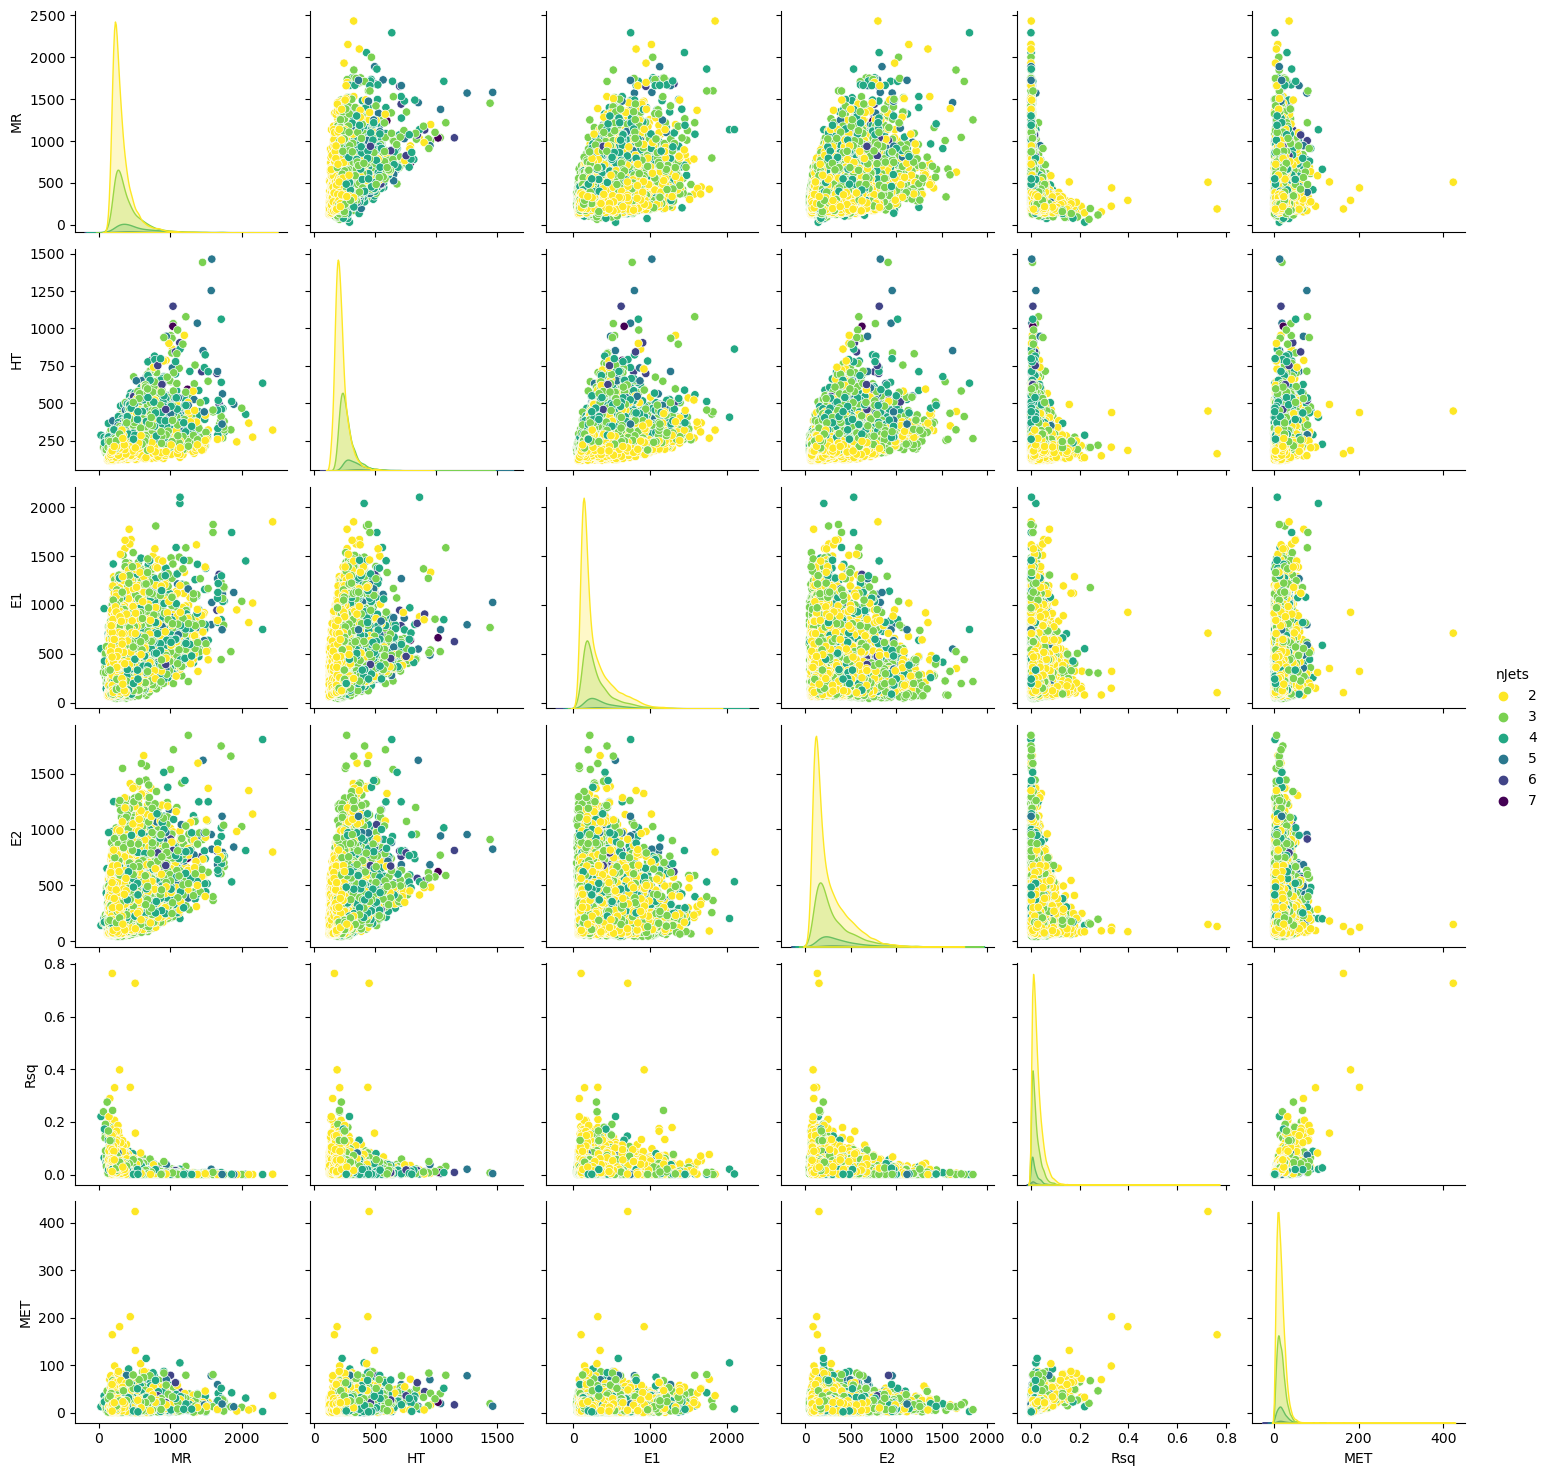

In [11]:
#seaborn to plot between any two columns, nJet which is the target is highlighted
sns.pairplot(
    a,hue="nJets",
    x_vars=["MR", "HT", "E1","E2","Rsq","MET"],
    y_vars=["MR", "HT", "E1","E2","Rsq","MET"],palette='viridis_r')

In [12]:
a.corr()

,Run,Lumi,Event,MR,Rsq,E1,Px1,Py1,Pz1,E2,Px2,Py2,Pz2,HT,MET,nJets,nBJets
Run,1.000000,0.814120,0.828349,0.009218,-0.001921,0.014263,0.015850,0.002356,0.004683,0.004427,-0.017229,-0.001842,0.005414,0.015782,0.009979,0.009275,0.004791
Lumi,0.814120,1.000000,0.995540,0.005482,0.001463,0.011389,0.014449,0.002632,0.010205,-0.001586,-0.014488,-0.003737,0.000539,0.012060,0.008728,0.006149,0.007959
Event,0.828349,0.995540,1.000000,0.006599,0.001522,0.011681,0.013982,0.002971,0.010125,-0.001093,-0.014217,-0.004027,-0.000418,0.013397,0.009328,0.008315,0.007770
MR,0.009218,0.005482,0.006599,1.000000,-0.400445,0.388358,0.009008,0.000094,-0.012394,0.429805,-0.008430,-0.001223,0.020789,0.509107,0.097489,0.310036,-0.008043
Rsq,-0.001921,0.001463,0.001522,-0.400445,1.000000,-0.132147,-0.011917,0.001459,-0.001638,-0.213361,0.012882,-0.007510,-0.007691,-0.122219,0.666990,-0.121244,0.031518
E1,0.014263,0.011389,0.011681,0.388358,-0.132147,1.000000,0.012579,-0.006257,-0.038786,-0.012103,-0.011407,0.003650,-0.004375,0.252013,0.044312,0.152637,-0.014219
Px1,0.015850,0.014449,0.013982,0.009008,-0.011917,0.012579,1.000000,0.000268,0.002570,0.001581,-0.965397,0.003520,0.006549,0.018387,-0.007510,-0.008989,-0.016321
Py1,0.002356,0.002632,0.002971,0.000094,0.001459,-0.006257,0.000268,1.000000,-0.000944,0.015735,-0.002592,-0.963998,-0.018123,-0.004286,0.011801,-0.000909,-0.006497
Pz1,0.004683,0.010205,0.010125,-0.012394,-0.001638,-0.038786,0.002570,-0.000944,1.000000,-0.003026,-0.002607,0.001233,0.081492,0.009012,-0.006718,-0.005358,-0.007934
E2,0.004427,-0.001586,-0.001093,0.429805,-0.213361,-0.012103,0.001581,0.015735,-0.003026,1.000000,-0.002446,-0.012903,-0.003045,0.276244,0.012234,0.189935,-0.024888


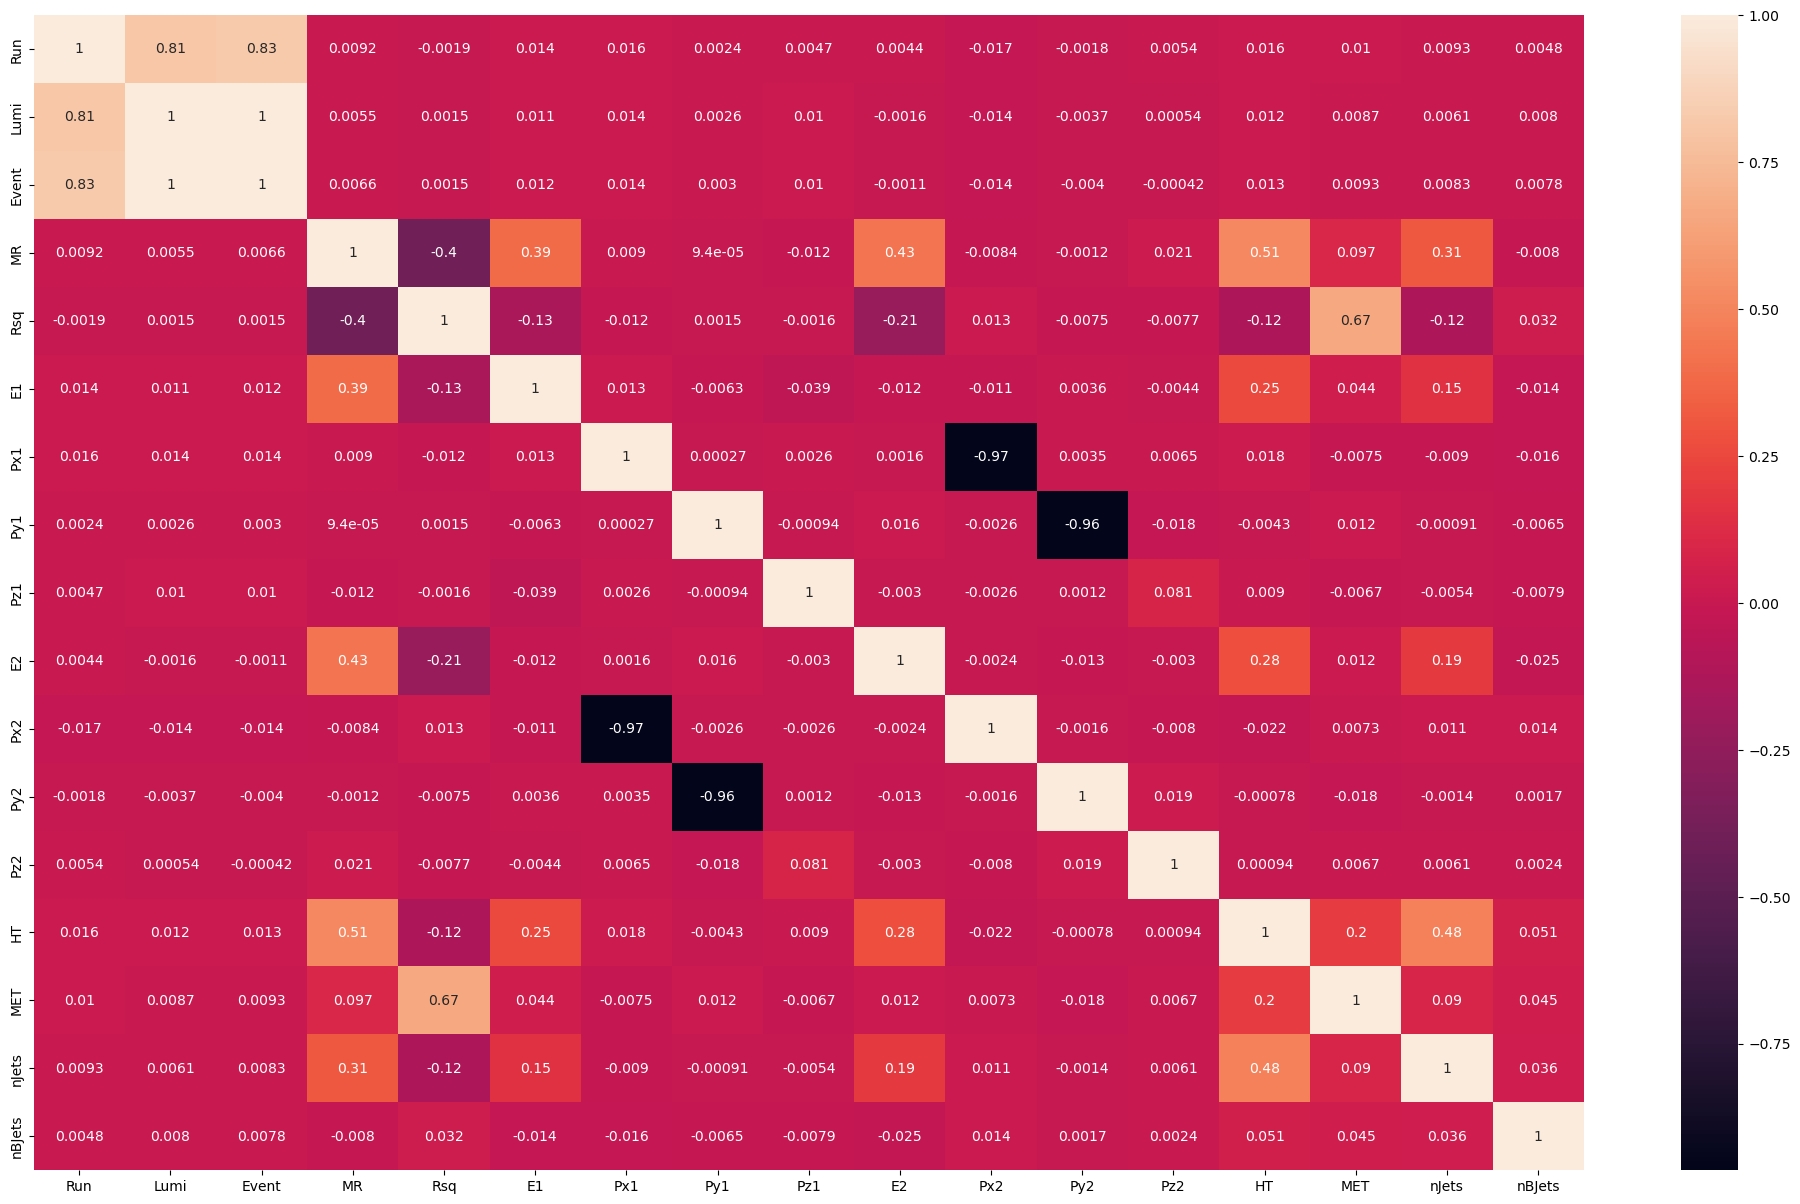

In [13]:
#Correlation matrix
sns.set_style()
plt.figure(figsize=(25,15))
sns.heatmap(a.corr(),annot=True)
plt.show()

In [14]:
# splitting x(inputs) and y(outputs)

x=a.drop(['nJets'],axis=1)
y=a["nJets"]
x

,Run,Lumi,Event,MR,Rsq,E1,Px1,Py1,Pz1,E2,Px2,Py2,Pz2,HT,MET,nBJets
0,148029,388,302318745,215.553,0.031977,136.7100,-109.89300,-54.03420,-58.9032,142.1790,70.02540,41.12250,-116.5130,203.666,18.31100,0
1,148029,388,302323641,155.437,0.042157,83.3865,81.15000,6.88361,-12.9688,73.9025,-72.24720,11.88350,3.0899,154.659,14.77470,0
2,148029,388,302336217,400.563,0.026938,253.1840,139.90200,102.64000,-101.9350,535.5510,-110.37900,-89.09290,-516.1790,343.280,25.22110,0
3,148029,388,302382289,286.245,0.094192,175.4860,-156.02400,-62.95350,-47.7434,112.8510,89.08430,3.45025,67.9007,257.397,46.02880,0
4,148029,388,302403873,204.514,0.018804,833.7950,100.41000,-16.65900,-827.4980,445.6120,-91.19910,15.55830,-390.1440,269.492,8.11345,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21721,149181,1804,1703614264,540.609,0.019221,333.8870,43.55990,-102.70100,114.4280,517.8890,-13.42100,51.57390,-503.3490,393.455,50.30450,0
21722,149181,1804,1703630424,336.015,0.028433,190.1890,-7.40921,135.39000,132.1900,152.3330,-6.69605,-130.51800,-76.1992,266.282,23.12280,0
21723,149181,1804,1703621104,484.392,0.000920,197.1530,-61.55070,21.76930,110.9250,483.9510,47.52920,-37.96000,-470.8470,261.615,3.71479,0
21724,149181,1804,1703642752,215.713,0.055836,647.4060,-78.95460,-88.75690,636.3600,383.0890,80.57020,49.37650,371.1240,213.289,20.95540,0


In [15]:
y

0        2
1        2
2        3
3        2
4        3
        ..
21721    4
21722    2
21723    4
21724    2
21725    4
Name: nJets, Length: 21726, dtype: int64

In [16]:
# Implementing Training and Testing

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

x_train

,Run,Lumi,Event,MR,Rsq,E1,Px1,Py1,Pz1,E2,Px2,Py2,Pz2,HT,MET,nBJets
14543,149181,998,983019020,211.874,0.085369,140.8530,31.25020,-135.35700,-1.57961,74.1439,-0.457919,71.57780,16.60020,210.497,27.38160,0
20121,149181,1802,1701684919,225.084,0.005437,91.0838,-22.74770,-75.82630,43.66450,154.1790,33.206300,58.47490,-138.25900,146.411,3.51378,0
11071,149181,991,975636825,205.501,0.045593,114.0060,7.49859,108.19500,-33.80420,139.0850,-18.869500,-79.81600,-110.03500,190.471,22.87420,0
9676,149181,985,970344926,319.859,0.031573,207.6200,-135.20300,-109.79300,94.36870,236.0740,107.564000,67.46020,198.26000,307.900,19.55410,0
9060,149181,985,969559922,166.342,0.181759,101.0920,62.10540,73.97140,26.35690,68.9047,-62.066300,-27.07720,-3.40212,164.302,47.92230,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,149181,992,976912400,268.860,0.031581,150.7900,118.45500,6.66933,92.15360,120.2920,-93.193600,-5.17192,-74.19200,211.979,19.33720,0
21575,149181,1804,1703206879,188.521,0.001871,155.6120,73.55400,-9.03438,-136.44700,74.5654,-66.721400,-28.02140,8.05937,146.474,1.21503,0
5390,147926,462,498088038,193.131,0.017051,138.9800,-43.05850,-90.25690,-94.66860,144.6650,49.184500,78.29780,-110.01600,192.466,6.30772,0
860,148029,389,303389516,279.580,0.003044,900.8620,-68.35240,92.00190,893.42400,177.9860,51.879500,-83.21340,147.88900,212.675,2.12651,0


In [17]:
y_train

14543    2
20121    2
11071    2
9676     3
9060     2
        ..
11964    2
21575    2
5390     2
860      2
15795    2
Name: nJets, Length: 15208, dtype: int64

In [18]:
# Preprocessing Steps

from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

scalar.fit(x_train)

x_train=scalar.fit_transform(x_train)
x_test-scalar.fit_transform(x_test)

,Run,Lumi,Event,MR,Rsq,E1,Px1,Py1,Pz1,E2,Px2,Py2,Pz2,HT,MET,nBJets
13474,149180.137089,996.796688,9.817499e+08,321.260054,0.296467,217.974487,96.693606,-137.625998,-134.517039,125.815925,-67.989214,97.441497,23.661664,289.859558,14.580849,-2.933101
4954,147927.241853,462.884036,4.981134e+08,412.032196,-0.187173,322.065183,-220.171975,14.066835,-230.369212,375.636452,175.985175,0.769453,-329.280581,399.343965,20.886964,0.228580
14301,149180.137089,997.794656,9.830484e+08,805.686205,0.417915,400.906417,295.368931,125.983866,-234.315486,493.757746,-266.053646,-141.994267,269.583042,699.922615,28.776872,0.228580
18423,149180.137089,1786.189039,1.691193e+09,512.367416,0.846734,1097.123626,77.017418,118.497843,1088.197642,129.268129,-41.741898,-111.150137,17.982064,264.816273,9.728833,0.228580
563,148030.069111,389.034436,3.026069e+08,243.435322,-0.268381,179.223805,92.171991,-55.841742,-140.491286,86.451747,-65.533580,20.545883,45.021395,179.356359,21.757584,0.228580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14927,149180.137089,997.794656,9.829125e+08,224.372834,0.434709,185.488140,38.682495,102.244175,147.149983,102.373979,-19.933513,-92.666847,28.094947,207.036455,8.153775,0.228580
18172,149180.137089,1786.189039,1.690988e+09,326.224140,-0.658619,524.660137,136.125305,-90.254999,-497.289055,430.689597,-135.226633,80.945477,-398.853754,323.773820,24.686694,0.228580
3333,148030.069111,394.024273,3.066512e+08,199.652879,0.304989,123.214097,-100.658151,24.299150,-61.603602,128.382438,90.294280,-11.669503,-86.486058,197.525772,7.298347,0.228580
19616,149180.137089,1800.160585,1.701717e+09,945.123302,1.023651,331.853393,64.592471,14.796450,-324.150539,691.906676,-57.659701,-19.289905,674.437301,217.635032,12.825122,0.228580


In [19]:
# Here we implement 5 classification models

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

model1=KNeighborsClassifier(n_neighbors=9,weights='uniform')
model2=GaussianNB()
model3=SVC()
model4=DecisionTreeClassifier(criterion='entropy')
model5=RandomForestClassifier(n_estimators=100)

modellist=[model1,model2,model3,model4,model5]

In [20]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

for i in modellist:
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    print('the classification details of model',i,'is below')
    print('the confusion matrix of ',i,'is')
    print( confusion_matrix(y_test,y_pred))
    print('accuracy score of',i,'is')
    print(accuracy_score(y_test,y_pred))
    print('the classification report of',i,'is')
    print(classification_report(y_test,y_pred))

the classification details of model KNeighborsClassifier(n_neighbors=9) is below
the confusion matrix of  KNeighborsClassifier(n_neighbors=9) is
[[4238    0    0    0    0    0]
 [1825    0    0    0    0    0]
 [ 387    0    0    0    0    0]
 [  53    0    0    0    0    0]
 [  13    0    0    0    0    0]
 [   2    0    0    0    0    0]]
accuracy score of KNeighborsClassifier(n_neighbors=9) is
0.6501994476833385
the classification report of KNeighborsClassifier(n_neighbors=9) is
              precision    recall  f1-score   support

           2       0.65      1.00      0.79      4238
           3       0.00      0.00      0.00      1825
           4       0.00      0.00      0.00       387
           5       0.00      0.00      0.00        53
           6       0.00      0.00      0.00        13
           7       0.00      0.00      0.00         2

    accuracy                           0.65      6518
   macro avg       0.11      0.17      0.13      6518
weighted avg       0.42 

<AxesSubplot:xlabel='nJets', ylabel='Event'>

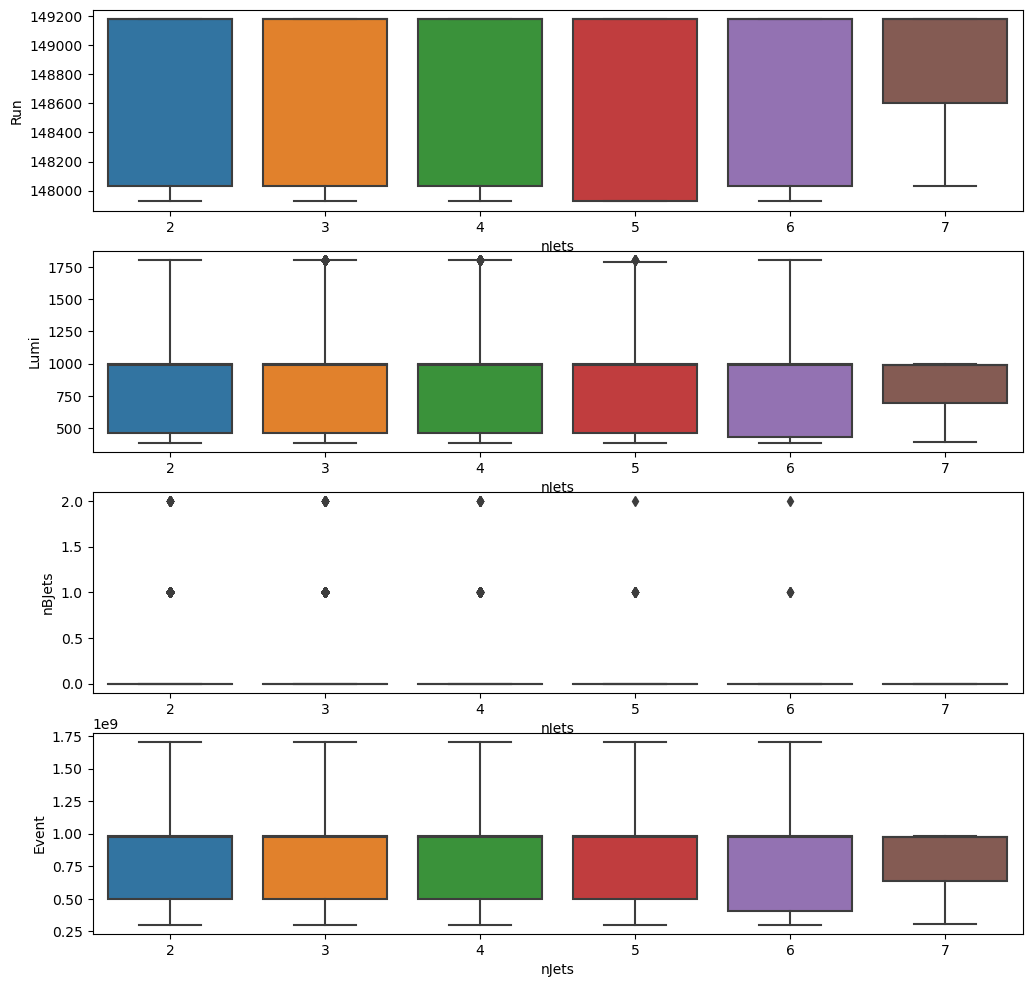

In [21]:
fig, axs = plt.subplots(4, figsize=(12, 12))
sns.boxplot(x=a['nJets'], y=a['Run'], ax=axs[0])
sns.boxplot(x=a['nJets'], y=a['Lumi'], ax=axs[1])
sns.boxplot(x=a['nJets'], y=a['nBJets'], ax=axs[2])
sns.boxplot(x=a['nJets'], y=a["Event"], ax=axs[3])